In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast

# load data
df = pd.read_csv('/Users/macbook/Desktop/BARRYMAC/data analysis/data_jobs.csv')

# data cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [25]:
# df_BA = df[df['job_title_short']== 'Data Analyst'].copy()
# df_BA

In [26]:
# df_BA['job_posted_month_no'] = df_BA['job_posted_date'].dt.month
# df_BA_explode = df_BA.explode('job_skills')
# df_BA_pivot = df_BA_explode.pivot_table(index = 'job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
# df_BA_pivot

In [27]:
# df_BA_pivot.loc['Total'] = df_BA_pivot.sum()

# df_BA_pivot = df_BA_pivot[df_BA_pivot.loc['Total'].sort_values(ascending=False).index]
# df_BA_pivot = df_BA_pivot.drop('Total')
# df_BA_pivot

In [28]:
# df_BA_pivot.iloc[:, :5].plot(kind='line')
# plt.title('Top 5 skills for Data Analyst per month')
# plt.ylabel('count')
# plt.xlabel('')
# plt.show()

<Axes: xlabel='job_title_short'>

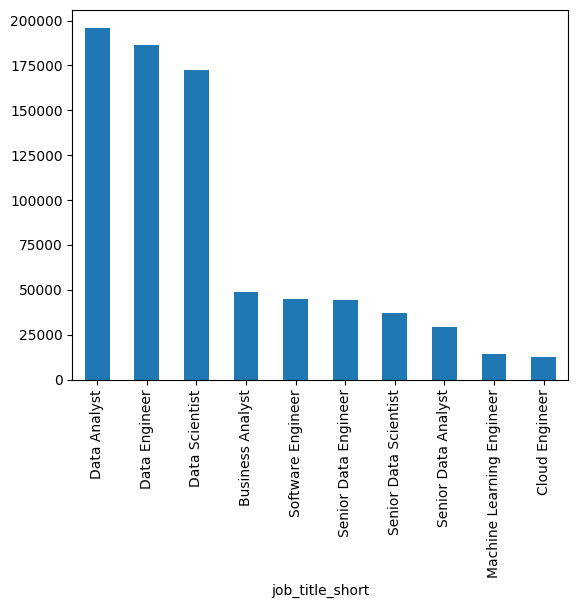

In [35]:
fig, ax = plt.subplots()
df['job_title_short'].value_counts().plot(kind='bar', ax =ax)

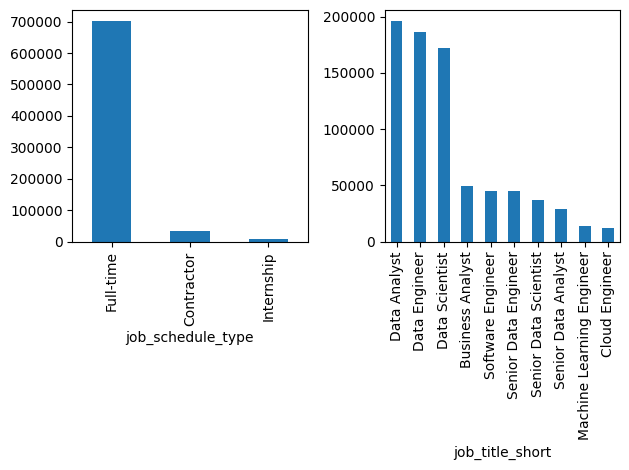

In [37]:
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])

# fix the overlap
fig.tight_layout()

plt.show()

In [38]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


In [40]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

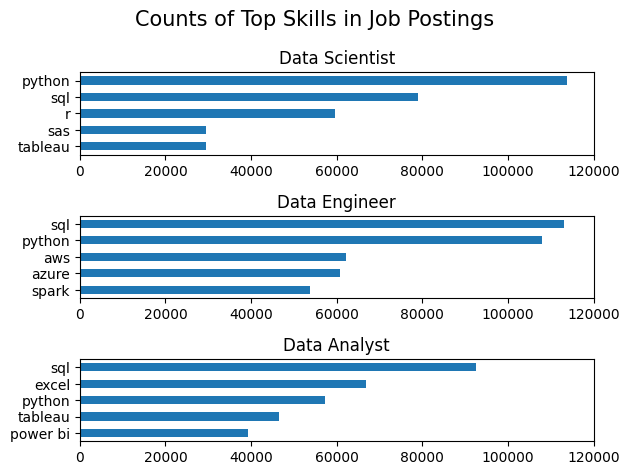

In [51]:
fig, ax = plt.subplots(3,1)

for i, job_title in enumerate(job_titles):
    df_plot = (df_skills_count[df_skills_count['job_title_short']== job_title].head(5))
    df_plot.plot(kind = 'barh', x = 'job_skills', y = 'skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)

    fig.tight_layout()
    fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)